**Az első 5 feladat ismétlés (többtáblás lekérdezések) a tanulmányi adatbázisból**

1. Készítsünk listát arról, hogy melyik óra melyik teremben van!
    
    1. Jelenítsük meg az óra azonosítóját és a terem nevét!
    2. A listát szűrjük a 3 karakter hosszú, \[100;199\] zárt intervallumba eső termekre! Feltesszük, hogy a 3 karakter hosszú terem nevek csak számjegyeket tartalmaznak.

In [7]:
SELECT o.ora_id, t.Terem
FROM Orak o JOIN Termek t ON o.terem= t.Tkód
WHERE len(t.Terem) = 3 AND t.Terem BETWEEN '100' AND '199'

(30 rows affected)

Total execution time: 00:00:00.022

ora_id,Terem
159,117
160,118
161,118
162,119
163,120
164,119
165,119
166,119
167,120
170,120


1. <mark>2. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Hány óra van összesen az egyes napokon?</span></mark>
2. Jelenítsük meg a napok nevét és az órák számát az adott napon!
3. Az oszlopokat nevezzük el értelemszerűen!
4. A listát rendezzük óraszám szerint növekvő sorrendbe!

In [8]:
SELECT n.nap, COUNT(*)
FROM Orak o JOIN Napok n ON o.nap = n.nap_id 
GROUP BY n.nap
ORDER BY COUNT(*) ASC

(5 rows affected)

Total execution time: 00:00:00.021

nap,(No column name)
Péntek,6
Szerda,6
Kedd,13
Csütörtök,19
Hétfő,23


<mark>3. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát arról, hogy melyik oktatónak hány órája van az Órák táblában!</span></mark>

1. A lista jelenítse meg az oktatók nevét, és az órák számát!
2. Az oszlopokat nevezzük el értelemszerűen!
3. A listából hagyjuk ki az óraadókat!

In [9]:
SELECT okt.nev, count(*)
FROM Orak o JOIN Oktatok okt ON o.tanar = okt.oktato_id JOIN Beosztasok b ON okt.beosztás = b.beosztas_id
WHERE b.beosztasnev <> 'Óraadó'
GROUP BY okt.nev

(15 rows affected)

Total execution time: 00:00:00.020

nev,(No column name)
Balkán András,3
Farkasos Piroska,7
Jogrerős Pál,2
Juhász András,2
Kiss János,4
Kovács László,4
Pelikán József,6
Róbert Gida,1
Szénási ászló,2
Szentágotai Istvás,8


<mark>4. <span style="color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Van-e olyan tantárgy, amelyből nincs óra?</span></mark>

1. Jelentsük meg a tantárgy nevét és a tantárgyfelelős nevét!

In [15]:
SELECT t.Tantárgynév, okt.nev
FROM Tantárgyak t  LEFT JOIN Orak o ON t.Tkód = o.targy JOIN Oktatok okt ON t.Tantárgyfelelős = okt.oktato_id
WHERE o.targy IS NULL


(1 row affected)

Total execution time: 00:00:00.019

Tantárgynév,nev
Folyami gáttan,Varga Kata


5. <span style="background-color: rgb(255, 255, 255); color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Hány óra van összesen a 120-as teremben?</span>

In [16]:
SELECT t.Terem, COUNT(*) 
FROM Orak o JOIN Termek t ON o.terem = t.Tkód
WHERE t.Terem = '120'
GROUP BY t.Terem

(1 row affected)

Total execution time: 00:00:00.020

Terem,(No column name)
120,8


**A 6-10 feladatokat halmazműveletek segítségével oldjuk meg, szintén a tanulmányi adatbázison**

6. <span style="background-color:rgb(255, 255, 255);color:rgb(36, 41, 47);font-family:-apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;;font-size:16px;font-weight:600;">Jelenítsük meg azon tanárok azonosítóját és nevét, akik hétfői vagy keddi napokon tanítanak!</span>

In [17]:
SELECT okt.oktato_id, okt.nev
FROM Oktatok okt JOIN Orak o ON okt.oktato_id = o.tanar JOIN Napok n ON o.nap = n.nap_id
WHERE n.nap = N'Hétfő'

UNION 

SELECT okt.oktato_id, okt.nev
FROM Oktatok okt JOIN Orak o ON okt.oktato_id = o.tanar JOIN Napok n ON o.nap = n.nap_id
WHERE n.nap = N'Kedd'


(17 rows affected)

Total execution time: 00:00:00.023

oktato_id,nev
1,Kovács László
2,Szentágotai Istvás
3,Szerb László
4,Ujfalussi István
5,Balkán András
6,Szép llonka
7,Kiss János
8,Pelikán József
9,Farkasos Piroska
10,Jogrerős Pál


7. <span style="background-color: rgb(255, 255, 255); color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; font-weight: 600;">Melyek azok a tantárgyak, amelyek esetén van óra a 8.00-kor kezdődő sávban, de nincs a 12.30-kor kezdődő sávban?</span>

In [21]:
SELECT t.Tantárgynév
FROM Tantárgyak t JOIN Orak o ON t.Tkód = o.targy JOIN Savok s ON o.Sav = s.Sav_id
WHERE s.Időpont = '8.00'

EXCEPT

SELECT t.Tantárgynév
FROM Tantárgyak t JOIN Orak o ON t.Tkód = o.targy JOIN Savok s ON o.Sav = s.Sav_id
WHERE s.Időpont = '12.30'


(3 rows affected)

Total execution time: 00:00:00.028

Tantárgynév
Az ürgeöntés hydrológiai alapjai II.
Fejezetek az ürgék jogaiból
Ürgevitel


8. <span style="background-color: rgb(255, 255, 255); color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; font-weight: 600;">Listázzuk azokat a termeket, amelyekben oktat Kovács László és van olyan tanóra a teremben, ahol a tantárgy nevében nem szerepel az 'ürge' szó!</span>

<mark>9. <span style="font-weight: 600; color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px;">Készítsünk listát arról, hogy melyik tanárnak hány órája van a (munka) hét elején (hétfőn), hét közben (kedd, szerda és csütörtök), illetve a hét végén (péntek)!</span></mark>

1. Jelenítsük meg a tanár azonosítóját, nevét, az időszakot (hét eleje - hét közben - hét vége), valamint az óraszámot!
2. A három megjelölt időszakot külön kérdezzük le, majd fűzzük össze a lekérdezések eredményeit!
3. Rendezzük a listát az oktató neve, azon belül időszak szerint!

In [27]:
SELECT okt.oktato_id, okt.nev, IIF(n.nap = N'Hétfő', 'Hét eleje', '') AS 'Időszak', COUNT(*)
FROM Oktatok okt JOIN Orak o ON okt.oktato_id = o.tanar JOIN Napok n ON o.nap = n.nap_id
WHERE n.nap = N'Hétfő'
GROUP BY okt.oktato_id, okt.nev, IIF(n.nap = N'Hétfő', 'Hét eleje', '')


UNION 

SELECT okt.oktato_id, okt.nev, IIF(n.nap = N'Kedd' OR n.nap = N'Szerda' OR n.nap = N'Csütörtök', 'Hét közepe', '') AS 'Időszak', COUNT(*)
FROM Oktatok okt JOIN Orak o ON okt.oktato_id = o.tanar JOIN Napok n ON o.nap = n.nap_id
WHERE n.nap = N'Kedd' OR n.nap = N'Szerda' OR n.nap = N'Csütörtök'
GROUP BY okt.oktato_id, okt.nev, IIF(n.nap = N'Kedd' OR n.nap = N'Szerda' OR n.nap = N'Csütörtök', 'Hét közepe', '')


UNION 

SELECT okt.oktato_id, okt.nev, IIF(n.nap = N'Péntek', 'Hét vége', '') AS 'Időszak', COUNT(*)
FROM Oktatok okt JOIN Orak o ON okt.oktato_id = o.tanar JOIN Napok n ON o.nap = n.nap_id
WHERE n.nap = N'Péntek'
GROUP BY okt.oktato_id, okt.nev, IIF(n.nap = N'Péntek', 'Hét vége', '') 

ORDER BY okt.nev, 'Időszak'

(33 rows affected)

Total execution time: 00:00:00.031

oktato_id,nev,Időszak,(No column name)
200,Aranyi Mária,Hét eleje,1
5,Balkán András,Hét eleje,2
5,Balkán András,Hét közepe,1
9,Farkasos Piroska,Hét eleje,2
9,Farkasos Piroska,Hét közepe,4
9,Farkasos Piroska,Hét vége,1
10,Jogrerős Pál,Hét eleje,2
301,Juhász András,Hét közepe,2
7,Kiss János,Hét eleje,2
7,Kiss János,Hét közepe,2


10. <span style="background-color: rgb(255, 255, 255); color: rgb(36, 41, 47); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; font-weight: 600;">Melyik napokon nincs órája Pelikán Józsefnek?</span>

In [30]:
SELECT Nap 
from Napok

EXCEPT

SELECT n.nap 
FROM Oktatok okt JOIN Orak o  ON okt.oktato_id = o.tanar JOIN Napok n ON o.nap = n.nap_id
WHERE okt.nev = 'Pelikán József'


(3 rows affected)

Total execution time: 00:00:00.024

nap
Csütörtök
Péntek
Szerda


**A 11-15 feladatok gyakorlásra szolgálnak a közelgő zh-ra :-)**

11. _Készítsünk listát az oktatók adatairól!_

1. Az oktatók titulusa és neve összefűzve jelenjen meg, közöttük szóközzel!
2. Ha valakinek nincs titulusa, akkor csak a neve jelenjen meg, szóköz nélkül!
3. A listát rendezzük a beosztás kódja, azon belül a státusz kódja szerint növekvő sorrendbe!
4. Az oszlopokat nevezzük el értelemszerűen!

In [36]:
SELECT o.oktato_id, b.beosztasnev, o.[status], IIF(LEFT(o.titulus, 3) = 'Dr.', 'Dr.' + ' ' + o.nev, LEFT(o.nev, CHARINDEX(' ', o.nev)-1) + RIGHT(o.nev, len(o.nev) - CHARINDEX(' ', o.nev))) AS Név
FROM Oktatok o JOIN Beosztasok b ON o.beosztás = b.beosztas_id
ORDER BY b.beosztas_id, o.[status]

(25 rows affected)

Total execution time: 00:00:00.022

oktato_id,beosztasnev,status,Név
18,Óraadó,1,NógrádiKata
19,Óraadó,1,RáczAndrás
20,Óraadó,1,KovácsAndrás
104,Óraadó,1,LudasMátyás
200,Óraadó,1,AranyiMária
300,Óraadó,1,SzabóAndrera
105,Óraadó,2,KissIstván
107,Óraadó,2,MészárosKriszta
108,Tanársegéd,1,RóbertGida
111,Tanársegéd,1,VitézJános


<span style="color: #09885a;">12</span>. Készítsünk listát, amely megmutatja, hogy összesen hány tantárgy van kreditenkénti csoportosításban!

  

A listából hagyjuk ki azokat a tételeket, ahol ez a darabszám <span style="color: #09885a;">1</span>!

A Folyami gáttan tantárgyat ne vegyük figyelembe!

A listát rendezzük darabszám szerint csökkenő sorrendbe!

Az oszlopokat nevezzük el értelemszerűen!

In [37]:
SELECT Kredit, COUNT(*)
FROM Tantárgyak
WHERE Tantárgynév <> 'Folyami gáttan'
GROUP BY Kredit
HAVING COUNT(*) <> 1
ORDER BY COUNT(*) DESC

(4 rows affected)

Total execution time: 00:00:00.017

Kredit,(No column name)
2,3
3,3
4,2
1,2


13. _Készítsünk listát az oktatók nevéről, a beosztásuk alapján elvárt és a tényleges óraszámukról!_

1. Az oszlopok neve legyen 'Oktató neve', 'Elvárt óraszám' és 'Tényleges óraszám'
2. Szűrjük a listát azokra az oktatókra, ahol az elvárt és a tényleges óraszám azonos

In [41]:
SELECT okt.nev, b.elvart, COUNT(ora_id) AS 'tényleges oraszám'
FROM Oktatok okt JOIN Orak o ON okt.oktato_id = o.tanar JOIN Beosztasok b ON okt.beosztás = b.beosztas_id
GROUP BY okt.nev, b.elvart
HAVING COUNT(ora_id) = b.elvart

(4 rows affected)

Total execution time: 00:00:00.020

nev,elvart,tényleges oraszám
Jogrerős Pál,2,2
Juhász András,2,2
Varga Kata,4,4
Pelikán József,6,6


14. _Készítsünk listát, amely megmutatja, hogy mely tantárgyból nincs óra egyáltalán!_

1. Csak a tantárgy neve jelenjen meg!

In [42]:
SELECT t.Tantárgynév
FROM Tantárgyak t LEFT JOIN Orak o ON t.Tkód = o.targy
WHERE o.targy IS NULL

(1 row affected)

Total execution time: 00:00:00.015

Tantárgynév
Folyami gáttan


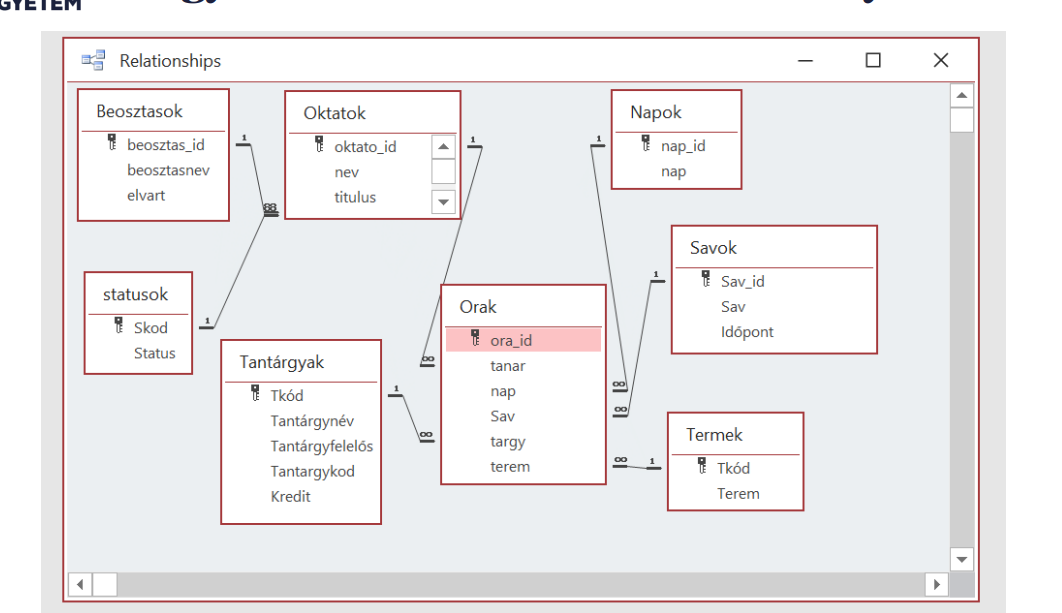

15. _Hány órájuk van az óraadóknak napi bontásban?_

1. Csak a napok nevét és az óraszámot jelenítsük meg!
2. Rendezzük a listát óraszám szerint növekvő sorrendbe!

In [43]:
SELECT n.nap, COUNT(*)
FROM statusok s JOIN Oktatok okt ON s.Skod = okt.[status] JOIN Orak o ON okt.oktato_id = o.tanar JOIN Napok n ON o.nap = n.nap_id
WHERE s.Status = 'Óraadó'
GROUP BY n.nap
ORDER BY 2 ASC

(5 rows affected)

Total execution time: 00:00:00.022

nap,(No column name)
Péntek,1
Szerda,1
Csütörtök,3
Kedd,3
Hétfő,5
